In [1]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
# Classifieur
clf = GaussianNB()
# Base d'exemples
dataset = make_moons(n_samples=120, noise=0.3,random_state=100)
# Pour générer autres datasets (voir : https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets )
# datasets.make_circles([n_samples, shuffle, ...])
# datasets.make_blobs([n_samples, n_features, ...])
# datasets.make_swiss_roll([n_samples, noise, ...])
# Générer la base des exemples
i= 45; print(dataset[0][i],dataset[1][i])

[ 0.29910305 -0.40924751] 1


Text(2.4229301233640297, -2.5484368824800745, '.83')

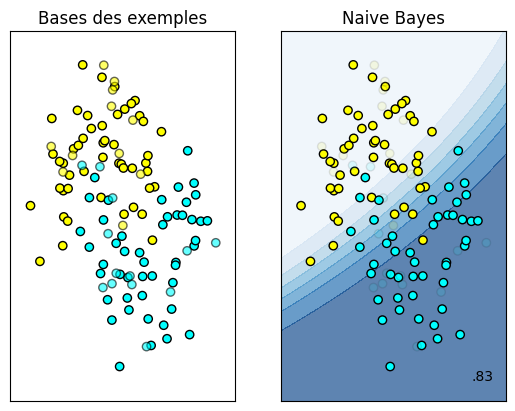

In [3]:
X, y = dataset
# Normaliser les données
X = StandardScaler().fit_transform(X)
# Exemples d'apprentissage + exemples de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
cm = plt.cm.Blues
cm_bright = ListedColormap(['#FFFF00', '#00FFFF'])
i=1
ax = plt.subplot(1, 2, 1)
ax.set_title("Bases des exemples")
# Afficher les données d'apprentissage + les données test
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='k')
h = .02 # Pas de disrètisation du plan
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
ax.set_xlim(xx.min(), xx.max()); ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(()); ax.set_yticks(())
ax = plt.subplot(1, 2, 2) # Nouveau axe
rs=clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
# Calculer la classe de chaque point du plan (après discrètisation) [x_min,␣x_max]x[y_min, y_max].
if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) # ravel pour␣concatener les lignes 2D to 1D
else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape) # 1D to 2D
ax.contourf(xx, yy, Z, cmap=cm, alpha=.65) # Tracer
# Superposition avec les données
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.1)
ax.set_xlim(xx.min(), xx.max()); ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(()); ax.set_yticks(())
ax.set_title("Naive Bayes")
ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'), size=10, horizontalalignment='right')